# Data Science & ML Project-1

### Project-1 
Apply
logistic Regression

SVM

Decision Tree

RandomForest

on the Loan dataset and check were you will get the best possible accuracy  

project note : Dependent Variable is Loan Status

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [3]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Droping Null Values

In [5]:
df = df.dropna()

In [6]:
df = df.drop('Loan_ID',axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 48.8+ KB


#### Converting Object to int Values

In [8]:
df['Dependents'].replace('3+','3',inplace=True)

In [9]:
df['Dependents'] = df['Dependents'].astype(int)

In [10]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
x = np.asanyarray(df)

In [12]:
x

array([['Male', 'Yes', 1, ..., 1.0, 'Rural', 'N'],
       ['Male', 'Yes', 0, ..., 1.0, 'Urban', 'Y'],
       ['Male', 'Yes', 0, ..., 1.0, 'Urban', 'Y'],
       ...,
       ['Male', 'Yes', 1, ..., 1.0, 'Urban', 'Y'],
       ['Male', 'Yes', 2, ..., 1.0, 'Urban', 'Y'],
       ['Female', 'No', 0, ..., 0.0, 'Semiurban', 'N']], dtype=object)

#### Applying Label Encoder & Standard Scaler

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
label_Gender = LabelEncoder()
label_Gender.fit(['Female','Male'])
x[:,0] = label_Gender.transform(x[:,0])

In [15]:
label_Married = LabelEncoder()
label_Married.fit(['No', 'Yes'])
x[:,1] = label_Married.transform(x[:,1])

In [16]:
label_Education = LabelEncoder()
label_Education.fit(['Graduate', 'Not Graduate'])
x[:,3] = label_Education.transform(x[:,3])

In [17]:
label_SelfEmployed = LabelEncoder()
label_SelfEmployed.fit(['No', 'Yes'])
x[:,4] = label_SelfEmployed.transform(x[:,4])

In [18]:
label_Propertyarea = LabelEncoder()
label_Propertyarea.fit(['Rural', 'Semiurban', 'Urban'])
x[:,-2] = label_Propertyarea.transform(x[:,-2])

In [19]:
label_LoanStatus = LabelEncoder()
label_LoanStatus.fit(['N', 'Y'])
x[:,-1] = label_LoanStatus.transform(x[:,-1])

In [20]:
x[:3]

array([[1, 1, 1, 0, 0, 4583, 1508.0, 128.0, 360.0, 1.0, 0, 0],
       [1, 1, 0, 0, 1, 3000, 0.0, 66.0, 360.0, 1.0, 2, 1],
       [1, 1, 0, 1, 0, 2583, 2358.0, 120.0, 360.0, 1.0, 2, 1]],
      dtype=object)

In [21]:
y = x[:,-1]

In [22]:
y = y.astype('int')

In [23]:
x = np.delete(x,[-1],axis=1)

In [24]:
x[:5]

array([[1, 1, 1, 0, 0, 4583, 1508.0, 128.0, 360.0, 1.0, 0],
       [1, 1, 0, 0, 1, 3000, 0.0, 66.0, 360.0, 1.0, 2],
       [1, 1, 0, 1, 0, 2583, 2358.0, 120.0, 360.0, 1.0, 2],
       [1, 0, 0, 0, 0, 6000, 0.0, 141.0, 360.0, 1.0, 2],
       [1, 1, 2, 0, 1, 5417, 4196.0, 267.0, 360.0, 1.0, 2]], dtype=object)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
x = StandardScaler().fit(x).transform(x)

In [27]:
x

array([[ 0.46719815,  0.73716237,  0.21859918, ...,  0.27554157,
         0.41319694, -1.31886834],
       [ 0.46719815,  0.73716237, -0.76203265, ...,  0.27554157,
         0.41319694,  1.25977445],
       [ 0.46719815,  0.73716237, -0.76203265, ...,  0.27554157,
         0.41319694,  1.25977445],
       ...,
       [ 0.46719815,  0.73716237,  0.21859918, ...,  0.27554157,
         0.41319694,  1.25977445],
       [ 0.46719815,  0.73716237,  1.19923101, ...,  0.27554157,
         0.41319694,  1.25977445],
       [-2.14041943, -1.35655324, -0.76203265, ...,  0.27554157,
        -2.42015348, -0.02954695]])

In [28]:
y

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,

###### Creating Train Test data

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [31]:
x_test

array([[ 0.46719815,  0.73716237, -0.76203265, ...,  0.27554157,
         0.41319694, -1.31886834],
       [ 0.46719815,  0.73716237, -0.76203265, ...,  0.27554157,
         0.41319694, -0.02954695],
       [ 0.46719815, -1.35655324, -0.76203265, ...,  2.1176022 ,
         0.41319694,  1.25977445],
       ...,
       [ 0.46719815,  0.73716237,  1.19923101, ...,  0.27554157,
         0.41319694, -1.31886834],
       [ 0.46719815, -1.35655324,  1.19923101, ...,  0.27554157,
        -2.42015348, -1.31886834],
       [ 0.46719815,  0.73716237, -0.76203265, ...,  0.27554157,
         0.41319694, -1.31886834]])

In [32]:
y_test

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1])

# Logistic regression!!

In [33]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver = 'lbfgs')
LR.fit(x_train,y_train)

LogisticRegression()

In [34]:
lpred_y = LR.predict(x_test)

In [35]:
lpred_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1])

In [36]:
y_test

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1])

In [37]:
from sklearn.metrics import f1_score
f1_score(y_test,lpred_y)

0.9019607843137256

# SVM !!

In [38]:
from sklearn import svm
clf = svm.SVC(kernel = 'linear')
clf.fit(x_train,y_train)

SVC(kernel='linear')

In [39]:
y_pred1 = clf.predict(x_test)

In [40]:
accuracy = f1_score(y_test,y_pred1,average='weighted')

In [41]:
accuracy

0.8397129186602871

# Decision Tree !!

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth=8)

In [43]:
dt.fit(x_train,y_train)
pred_y2 = dt.predict(x_test)

In [44]:
from sklearn import metrics
accuracy = metrics.accuracy_score(pred_y2,y_test)

In [45]:
accuracy

0.8125

# RandomForest !!

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 700, criterion = 'entropy')
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=700)

In [47]:
y_pred3 = rf.predict(x_test)

In [48]:
from sklearn.metrics import f1_score
f1_score(y_pred3,y_test)

0.9261744966442952

##We got Best Acuracy in Random Forest..

## Project-2

Apply Exploratory Data Analysis on the FifaDataset

Convert the appropriate columns to machine understandable columns using label encoding

Handle Null values

Apply the correlation and remove the column which are more than 60% correlated

Apply the variance and remove the columns whose variance is less that 20%

Understand the Dataset whether the dataset is corr

In [49]:
df = pd.read_csv('fifa_cleaned.csv')

In [50]:
df.head()

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,...,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,190460,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,...,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
2,195864,P. Pogba,Paul Pogba,1993-03-15,25,190.50,83.9,"CM,CAM",France,88,...,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
3,198219,L. Insigne,Lorenzo Insigne,1991-06-04,27,162.56,59.0,"LW,ST",Italy,88,...,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
4,201024,K. Koulibaly,Kalidou Koulibaly,1991-06-20,27,187.96,88.9,CB,Senegal,88,...,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3


### EDA - Exploratory Data Analysis

In [51]:
df.shape

(17954, 92)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 92 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             17954 non-null  int64  
 1   name                           17954 non-null  object 
 2   full_name                      17954 non-null  object 
 3   birth_date                     17954 non-null  object 
 4   age                            17954 non-null  int64  
 5   height_cm                      17954 non-null  float64
 6   weight_kgs                     17954 non-null  float64
 7   positions                      17954 non-null  object 
 8   nationality                    17954 non-null  object 
 9   overall_rating                 17954 non-null  int64  
 10  potential                      17954 non-null  int64  
 11  value_euro                     17699 non-null  float64
 12  wage_euro                      17708 non-null 

In [53]:
df.describe()

,id,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),...,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
count,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,1.769900e+04,17708.000000,17954.000000,17954.000000,...,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000
mean,215411.087780,25.565445,174.946921,75.301047,66.240169,71.430935,2.479280e+06,9902.134628,1.111674,2.945695,...,48.357302,58.680183,47.162861,47.733040,45.705915,16.784449,16.556199,16.388660,16.541049,16.874067
std,29758.387106,4.705708,14.029449,7.083684,6.963730,6.131339,5.687014e+06,21995.593750,0.392168,0.663691,...,15.810844,11.625541,20.037346,21.674973,21.285812,17.893895,17.108234,16.701447,17.231495,18.182943
min,16.000000,17.000000,152.400000,49.900000,47.000000,48.000000,1.000000e+04,1000.000000,1.000000,1.000000,...,5.000000,12.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,201117.250000,22.000000,154.940000,69.900000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,38.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,222919.000000,25.000000,175.260000,74.800000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.500000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,237613.500000,29.000000,185.420000,79.800000,71.000000,75.000000,2.100000e+06,9000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,247607.000000,46.000000,205.740000,110.200000,94.000000,95.000000,1.105000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,93.000000,90.000000,90.000000,92.000000,92.000000,90.000000,94.000000


In [54]:
df.columns

Index(['id', 'name', 'full_name', 'birth_date', 'age', 'height_cm',
       'weight_kgs', 'positions', 'nationality', 'overall_rating', 'potential',
       'value_euro', 'wage_euro', 'preferred_foot',
       'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)',
       'work_rate', 'body_type', 'release_clause_euro', 'club_team',
       'club_rating', 'club_position', 'club_jersey_number', 'club_join_date',
       'contract_end_year', 'national_team', 'national_rating',
       'national_team_position', 'national_jersey_number', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle',
  

#### droping Unwanted columns.

In [55]:
##Drooping Unwanted Columns..
df.drop(['id','full_name','birth_date','national_team','national_team_position', 'national_jersey_number','tags', 
         'traits','club_join_date','contract_end_year'],axis=1,inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   age                            17954 non-null  int64  
 2   height_cm                      17954 non-null  float64
 3   weight_kgs                     17954 non-null  float64
 4   positions                      17954 non-null  object 
 5   nationality                    17954 non-null  object 
 6   overall_rating                 17954 non-null  int64  
 7   potential                      17954 non-null  int64  
 8   value_euro                     17699 non-null  float64
 9   wage_euro                      17708 non-null  float64
 10  preferred_foot                 17954 non-null  object 
 11  international_reputation(1-5)  17954 non-null  int64  
 12  weak_foot(1-5)                 17954 non-null 

#### Columns 54 to 79 were converted from String to Float values, by adding values present in that columns.

In [57]:
Columns = df.columns[56:83]

In [58]:
df[Columns] = df[Columns].apply(lambda x: x.str.split('+').str[0].astype(float) + x.str.split('+').str[-1].astype(float))

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   age                            17954 non-null  int64  
 2   height_cm                      17954 non-null  float64
 3   weight_kgs                     17954 non-null  float64
 4   positions                      17954 non-null  object 
 5   nationality                    17954 non-null  object 
 6   overall_rating                 17954 non-null  int64  
 7   potential                      17954 non-null  int64  
 8   value_euro                     17699 non-null  float64
 9   wage_euro                      17708 non-null  float64
 10  preferred_foot                 17954 non-null  object 
 11  international_reputation(1-5)  17954 non-null  int64  
 12  weak_foot(1-5)                 17954 non-null 

### Top 10 height paid players.

In [60]:
player_sal = df[['name','wage_euro']]

In [61]:
player_sal = player_sal.sort_values(by = ['wage_euro'],ascending=False)
player_sal.head(10)

,name,wage_euro
0,L. Messi,565000.0
17938,L. Suárez,455000.0
17939,L. Modrić,420000.0
17944,Cristiano Ronaldo,405000.0
17941,K. De Bruyne,355000.0
17934,T. Kroos,355000.0
17924,G. Bale,355000.0
17940,E. Hazard,340000.0
17928,Coutinho,340000.0
10,Sergio Busquets,315000.0


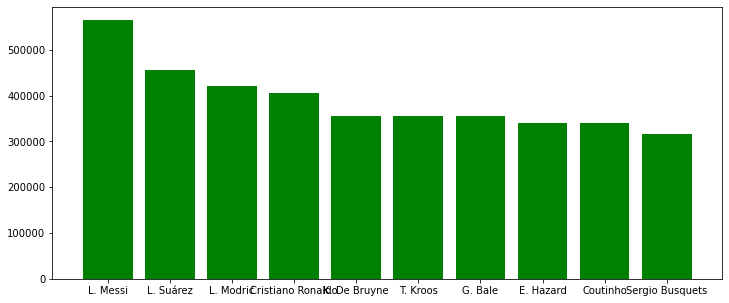

In [62]:
plt.figure(figsize=(12,5))
plt.bar(list(player_sal['name'])[0:10],list(player_sal['wage_euro'])[0:10],color='g')
plt.show()

Observation:- Top 5 Most salaries are taken by L. Messi, L. Suárez, L. Modrić, Cristiano Ronaldo & K. De Bruyne.

#### Major players Nationality.

In [63]:
df['nationality'].value_counts()[0:10]

England        1658
Germany        1199
Spain          1070
France          925
Argentina       904
Brazil          832
Italy           655
Colombia        624
Japan           466
Netherlands     441
Name: nationality, dtype: int64

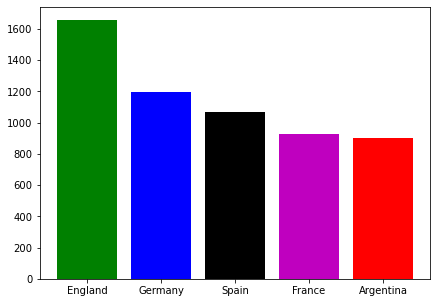

In [64]:
plt.figure(figsize=(7,5))
plt.bar(list(df['nationality'].value_counts()[0:5].index),list(df['nationality'].value_counts()[0:5]),color=['g','b','black','m','r'])
plt.show()

Observation:- Most of the football players belong to England, Germany, Span, France, Argentina

#### Top 10 overall rating Players

In [65]:
Rating = df[['name','overall_rating']]
Rating = Rating.sort_values(by = ['overall_rating'],ascending=False)
Rating.head(10)

,name,overall_rating
0,L. Messi,94
17944,Cristiano Ronaldo,94
17943,Neymar Jr,92
17939,L. Modrić,91
17942,De Gea,91
17941,K. De Bruyne,91
17938,L. Suárez,91
17940,E. Hazard,91
17936,J. Oblak,90
17935,R. Lewandowski,90


Obeservation:- Top 10 Overall_Rating players are mentioned Above.

#### Indian Players in the list. 

In [66]:
india = df[df['nationality']=='India']
india.head(10)

,name,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
3370,J. Lalpekhlua,28,175.26,74.8,"ST,LM,CF",India,63,63,NaN,NaN,...,52.0,47.0,47.0,47.0,52.0,50.0,45.0,45.0,45.0,50.0
4163,A. Thapa,21,170.18,64.0,"CM,CDM",India,59,71,NaN,NaN,...,59.0,59.0,59.0,59.0,59.0,58.0,55.0,55.0,55.0,58.0
4295,S. Bose,23,185.42,78.0,LB,India,58,66,NaN,NaN,...,57.0,53.0,53.0,53.0,57.0,59.0,61.0,61.0,61.0,59.0
4507,J. Lalrinzuala,20,175.26,68.0,"LB,LM",India,56,64,NaN,NaN,...,56.0,51.0,51.0,51.0,56.0,57.0,54.0,54.0,54.0,57.0
4512,A. Kuruniyan,21,175.26,69.9,"LW,LM,ST",India,56,70,NaN,NaN,...,44.0,38.0,38.0,38.0,44.0,42.0,34.0,34.0,34.0,42.0
4650,G. Singh,22,152.40,72.1,CM,India,54,63,NaN,NaN,...,56.0,56.0,56.0,56.0,56.0,55.0,54.0,54.0,54.0,55.0
4652,D. Lalhlimpuia,21,182.88,76.2,"ST,RW",India,54,67,NaN,NaN,...,36.0,35.0,35.0,35.0,36.0,35.0,34.0,34.0,34.0,35.0
4676,V. Rai,21,182.88,73.9,CM,India,53,67,NaN,NaN,...,53.0,55.0,55.0,55.0,53.0,54.0,55.0,55.0,55.0,54.0
5144,S. Golui,21,187.96,73.9,RB,India,52,66,NaN,NaN,...,51.0,47.0,47.0,47.0,51.0,53.0,54.0,54.0,54.0,53.0
5380,C. Singh,22,190.50,78.9,CB,India,53,62,NaN,NaN,...,48.0,46.0,46.0,46.0,48.0,50.0,54.0,54.0,54.0,50.0


In [67]:
india.shape

(30, 82)

Observation:- 30 indian players are there in the list.

In [68]:
Rating = india[['name','overall_rating']]
Rating = Rating.sort_values(by = ['overall_rating'],ascending=False)
Rating.head(10)

,name,overall_rating
11719,S. Chhetri,67
10735,S. Jhingan,65
8756,G. Singh Sandhu,63
3370,J. Lalpekhlua,63
7878,P. Halder,61
7772,P. Kotal,61
7415,N. Das,60
7358,U. Singh,60
7263,H. Narzary,60
6968,R. Singh,59


Obeservation:- Top 10 Indian Overall_Rating players are mentioned Above.

#### Tallest Players in india & Worldwide. 

In [69]:
india.sort_values(by = ['height_cm'],ascending=False).head()

,name,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
8756,G. Singh Sandhu,27,193.04,89.8,GK,India,63,67,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5380,C. Singh,22,190.50,78.9,CB,India,53,62,NaN,NaN,...,48.0,46.0,46.0,46.0,48.0,50.0,54.0,54.0,54.0,50.0
10735,S. Jhingan,25,187.96,73.9,CB,India,65,71,NaN,NaN,...,57.0,58.0,58.0,58.0,57.0,60.0,66.0,66.0,66.0,60.0
5144,S. Golui,21,187.96,73.9,RB,India,52,66,NaN,NaN,...,51.0,47.0,47.0,47.0,51.0,53.0,54.0,54.0,54.0,53.0
5634,V. Kaith,22,187.96,79.8,GK,India,55,64,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observation:- Tallest Player in india is 'G. Singh Sandhu'.

In [70]:
df.sort_values(by = ['height_cm'],ascending=False).head()

,name,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
2839,T. Holý,27,205.74,102.1,GK,Czech Republic,65,69,500000.0,2000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7530,M. Qvist,25,203.20,93.9,"LM,LB,ST",Denmark,61,64,325000.0,2000.0,...,62.0,62.0,62.0,62.0,62.0,62.0,64.0,64.0,64.0,62.0
3065,A. Noppert,24,203.20,93.9,GK,Netherlands,64,68,425000.0,1000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8976,A. Chapman,28,203.20,92.1,GK,England,63,65,300000.0,2000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2620,K. Scherpen,19,203.20,84.8,GK,Netherlands,66,80,1100000.0,1000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observation:- The tallest football player is 'T. Holý' and he is from 'Czech Republic'.

### Converting the appropriate columns to machine understandable columns using label encoding 

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   age                            17954 non-null  int64  
 2   height_cm                      17954 non-null  float64
 3   weight_kgs                     17954 non-null  float64
 4   positions                      17954 non-null  object 
 5   nationality                    17954 non-null  object 
 6   overall_rating                 17954 non-null  int64  
 7   potential                      17954 non-null  int64  
 8   value_euro                     17699 non-null  float64
 9   wage_euro                      17708 non-null  float64
 10  preferred_foot                 17954 non-null  object 
 11  international_reputation(1-5)  17954 non-null  int64  
 12  weak_foot(1-5)                 17954 non-null 

In [72]:
df.drop(['name'],axis=1,inplace=True)

In [73]:
from sklearn.preprocessing import LabelEncoder

In [74]:
label_encoder = LabelEncoder() #Creating Instance for LabelEncoder()

In [75]:
label_encoder

LabelEncoder()

In [76]:
df['club_position']=df['club_position'].fillna('0')
df['club_team']=df['club_team'].fillna('0')

In [77]:
df['club_position'].value_counts()

SUB    7870
RES    2885
LCB     655
RCB     654
GK      644
LB      549
RB      547
ST      449
RM      417
LM      414
RCM     413
LCM     411
CAM     308
LDM     235
RDM     234
RS      205
LS      204
CDM     147
RW      144
LW      144
CB      114
CM       80
RWB      67
LWB      66
RAM      21
LAM      20
LF       16
RF       16
0        14
CF       11
Name: club_position, dtype: int64

In [78]:
#Applying Label Encoder for Categorical 
df['positions'] = label_encoder.fit_transform(df['positions'])
df['nationality'] = label_encoder.fit_transform(df['nationality'])
df['preferred_foot'] = label_encoder.fit_transform(df['preferred_foot'])
df['work_rate'] = label_encoder.fit_transform(df['work_rate'])
df['body_type'] = label_encoder.fit_transform(df['body_type'])
df['club_position'] = label_encoder.fit_transform(df['club_position'])
df['club_team'] = label_encoder.fit_transform(df['club_team'])

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 81 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            17954 non-null  int64  
 1   height_cm                      17954 non-null  float64
 2   weight_kgs                     17954 non-null  float64
 3   positions                      17954 non-null  int32  
 4   nationality                    17954 non-null  int32  
 5   overall_rating                 17954 non-null  int64  
 6   potential                      17954 non-null  int64  
 7   value_euro                     17699 non-null  float64
 8   wage_euro                      17708 non-null  float64
 9   preferred_foot                 17954 non-null  int32  
 10  international_reputation(1-5)  17954 non-null  int64  
 11  weak_foot(1-5)                 17954 non-null  int64  
 12  skill_moves(1-5)               17954 non-null 

All the columns are converted Categorical values into Numarical Values Using label encoder.

### Handling Null values

In [80]:
df.isnull().sum().sum() #Total null values in dataset.

73153

In [81]:
def impute_null_mean(df,variable,value):
    df[variable+'mean'] = df[variable].fillna(value)

In [82]:
def impute_null_median(df,variable,value):
    df[variable+'median'] = df[variable].fillna(value)

In [83]:
def impute_null_mode(df,variable,value):
    df[variable+'mode'] = df[variable].fillna(value)

In [84]:
value_euro_median = df.value_euro.median()
impute_null_median(df,'value_euro',value_euro_median)

In [85]:
value_euro_mean = df.value_euro.mean()
impute_null_mean(df,'value_euro',value_euro_mean)

In [86]:
value_euro_mode = df.value_euro.mode()
impute_null_mode(df,'value_euro',value_euro_mode[0])

In [87]:
df['zero'] = df['value_euro'].fillna(0)

In [88]:
print(f"""Std of date original {df['value_euro'].std()} 
mean {df['value_euromean'].std()} 
Median {df['value_euromedian'].std()}
Mode {df['value_euromode'].std()}
Zero {df['zero'].std()}""")

Std of date original 5687013.850993571 
mean 5646480.93277281 
Median 5650404.856928944
Mode 5648839.2222180385
Zero 5654097.183194811


In [89]:
df.drop(['zero','value_euromode','value_euromean','value_euromedian'],inplace=True,axis=1)

In [90]:
df['value_euro'] = df['value_euro'].fillna(0)

In [91]:
df.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,31,170.18,72.1,214,6,94,94,110500000.0,565000.0,0,...,66.0,63.0,63.0,63.0,66.0,61.0,50.0,50.0,50.0,61.0
1,27,154.94,76.2,72,39,88,89,69500000.0,205000.0,1,...,74.0,74.0,74.0,74.0,74.0,69.0,60.0,60.0,60.0,69.0
2,25,190.50,83.9,228,53,88,91,73000000.0,255000.0,1,...,79.0,80.0,80.0,80.0,79.0,77.0,75.0,75.0,75.0,77.0
3,27,162.56,59.0,549,76,88,88,62000000.0,165000.0,1,...,66.0,61.0,61.0,61.0,66.0,61.0,47.0,47.0,47.0,61.0
4,27,187.96,88.9,104,126,88,91,60000000.0,135000.0,1,...,76.0,80.0,80.0,80.0,76.0,79.0,88.0,88.0,88.0,79.0


Conclusion:- Value_Euro column null values filled with Zero.

In [92]:
wage_euro_null = df.wage_euro.mode()
impute_null_mode(df,'wage_euro',wage_euro_null[0])

In [93]:
wage_euro_null = df.wage_euro.mean()
impute_null_mean(df,'wage_euro',wage_euro_null)

In [94]:
wage_euro_null = df.wage_euro.median()
impute_null_median(df,'wage_euro',wage_euro_null)

In [95]:
print(f"""Std of date original {df['wage_euro'].std()} 
mean {df['wage_euromean'].std()} 
Median {df['wage_euromedian'].std()}
Mode {df['wage_euromode'].std()}""")

Std of date original 21995.593750195694 
mean 21844.377244649688 
Median 21859.109089548758
Mode 21868.87811626292


In [96]:
df.drop(['wage_euro','wage_euromedian','wage_euromean'],inplace=True,axis=1)

In [97]:
df.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,preferred_foot,international_reputation(1-5),...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,wage_euromode
0,31,170.18,72.1,214,6,94,94,110500000.0,0,5,...,63.0,63.0,63.0,66.0,61.0,50.0,50.0,50.0,61.0,565000.0
1,27,154.94,76.2,72,39,88,89,69500000.0,1,3,...,74.0,74.0,74.0,74.0,69.0,60.0,60.0,60.0,69.0,205000.0
2,25,190.50,83.9,228,53,88,91,73000000.0,1,4,...,80.0,80.0,80.0,79.0,77.0,75.0,75.0,75.0,77.0,255000.0
3,27,162.56,59.0,549,76,88,88,62000000.0,1,3,...,61.0,61.0,61.0,66.0,61.0,47.0,47.0,47.0,61.0,165000.0
4,27,187.96,88.9,104,126,88,91,60000000.0,1,3,...,80.0,80.0,80.0,76.0,79.0,88.0,88.0,88.0,79.0,135000.0


Conclusion:- wage_euro column null values filled with Mode Method.

In [98]:
release_clause_euro_median = df.release_clause_euro.median()
impute_null_median(df,'release_clause_euro',release_clause_euro_median)

In [99]:
release_clause_euro_mean = df.release_clause_euro.mean()
impute_null_mean(df,'release_clause_euro',release_clause_euro_mean)

In [100]:
release_clause_euro_mode = df.release_clause_euro.mode()
impute_null_mode(df,'release_clause_euro',release_clause_euro_mode[0])

In [101]:
df['zero'] = df['release_clause_euro'].fillna(0)

In [102]:
print(f"""Std of date original {df['release_clause_euro'].std()} 
mean {df['release_clause_euromean'].std()} 
Median {df['release_clause_euromedian'].std()}
Mode {df['release_clause_euromode'].std()}
Zero{df['zero'].std()}""")

Std of date original 11290771.42391396 
mean 10697535.32650895 
Median 10747706.781956632
Mode 10750674.10194301
Zero10788881.240747567


In [103]:
df.drop(['release_clause_euromean','release_clause_euromedian','release_clause_euromode','zero'],inplace=True,axis=1)

In [104]:
df['release_clause_euro'] = df['release_clause_euro'].fillna(0)

In [105]:
df.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,preferred_foot,international_reputation(1-5),...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,wage_euromode
0,31,170.18,72.1,214,6,94,94,110500000.0,0,5,...,63.0,63.0,63.0,66.0,61.0,50.0,50.0,50.0,61.0,565000.0
1,27,154.94,76.2,72,39,88,89,69500000.0,1,3,...,74.0,74.0,74.0,74.0,69.0,60.0,60.0,60.0,69.0,205000.0
2,25,190.50,83.9,228,53,88,91,73000000.0,1,4,...,80.0,80.0,80.0,79.0,77.0,75.0,75.0,75.0,77.0,255000.0
3,27,162.56,59.0,549,76,88,88,62000000.0,1,3,...,61.0,61.0,61.0,66.0,61.0,47.0,47.0,47.0,61.0,165000.0
4,27,187.96,88.9,104,126,88,91,60000000.0,1,3,...,80.0,80.0,80.0,76.0,79.0,88.0,88.0,88.0,79.0,135000.0


Conclusion:- release_clause_euro column null values filled with Zero.

In [106]:
club_rating_median = df.club_rating.median()
impute_null_median(df,'club_rating',club_rating_median)
club_rating_mean = df.club_rating.mean()
impute_null_mean(df,'club_rating',club_rating_mean)
club_rating_mode = df.club_rating.mode()
impute_null_mode(df,'club_rating',club_rating_mode[0])
df['zero'] = df['club_rating'].fillna(0)

In [107]:
print(f"""Std of date original {df['club_rating'].std()} 
mean {df['club_ratingmean'].std()} 
Median {df['club_ratingmedian'].std()}
Mode {df['club_ratingmode'].std()}
Zero {df['zero'].std()}""")

Std of date original 5.091678343029169 
mean 5.089692674918267 
Median 5.0897028259612505
Mode 5.089835122189134
Zero 5.445551593441185


In [108]:
df.drop(['club_rating','club_ratingmean','club_ratingmode','zero'],inplace=True,axis=1)

In [109]:
df.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,preferred_foot,international_reputation(1-5),...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,wage_euromode,club_ratingmedian
0,31,170.18,72.1,214,6,94,94,110500000.0,0,5,...,63.0,63.0,66.0,61.0,50.0,50.0,50.0,61.0,565000.0,86.0
1,27,154.94,76.2,72,39,88,89,69500000.0,1,3,...,74.0,74.0,74.0,69.0,60.0,60.0,60.0,69.0,205000.0,83.0
2,25,190.50,83.9,228,53,88,91,73000000.0,1,4,...,80.0,80.0,79.0,77.0,75.0,75.0,75.0,77.0,255000.0,82.0
3,27,162.56,59.0,549,76,88,88,62000000.0,1,3,...,61.0,61.0,66.0,61.0,47.0,47.0,47.0,61.0,165000.0,82.0
4,27,187.96,88.9,104,126,88,91,60000000.0,1,3,...,80.0,80.0,76.0,79.0,88.0,88.0,88.0,79.0,135000.0,82.0


Conclusion:- club_rating column null values filled with Median method.

In [110]:
club_jersey_number_median = df.club_jersey_number.median()
impute_null_median(df,'club_jersey_number',club_jersey_number_median)
club_jersey_number_mean = df.club_jersey_number.mean()
impute_null_mean(df,'club_jersey_number',club_jersey_number_mean)
club_jersey_number_mode = df.club_jersey_number.mode()
impute_null_mode(df,'club_jersey_number',club_jersey_number_mode[0])
df['zero'] = df['club_jersey_number'].fillna(0)

In [111]:
print(f"""Std of date original {df['club_jersey_number'].std()} 
mean {df['club_jersey_numbermean'].std()} 
Median {df['club_jersey_numbermedian'].std()}
Mode {df['club_jersey_numbermode'].std()}
Zero {df['zero'].std()}""")

Std of date original 16.464734041551353 
mean 16.458313074801648 
Median 16.45843800859208
Mode 16.461892480663167
Zero 16.468062654174457


In [112]:
df.drop(['club_jersey_number','club_jersey_numbermean','club_jersey_numbermedian','zero'],inplace=True,axis=1)

In [113]:
df.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,preferred_foot,international_reputation(1-5),...,RDM,RWB,LB,LCB,CB,RCB,RB,wage_euromode,club_ratingmedian,club_jersey_numbermode
0,31,170.18,72.1,214,6,94,94,110500000.0,0,5,...,63.0,66.0,61.0,50.0,50.0,50.0,61.0,565000.0,86.0,10.0
1,27,154.94,76.2,72,39,88,89,69500000.0,1,3,...,74.0,74.0,69.0,60.0,60.0,60.0,69.0,205000.0,83.0,23.0
2,25,190.50,83.9,228,53,88,91,73000000.0,1,4,...,80.0,79.0,77.0,75.0,75.0,75.0,77.0,255000.0,82.0,6.0
3,27,162.56,59.0,549,76,88,88,62000000.0,1,3,...,61.0,66.0,61.0,47.0,47.0,47.0,61.0,165000.0,82.0,24.0
4,27,187.96,88.9,104,126,88,91,60000000.0,1,3,...,80.0,76.0,79.0,88.0,88.0,88.0,79.0,135000.0,82.0,26.0


Conclusion:- club_jersey_number column null values filled with Mode method.

In [114]:
national_rating_median = df.national_rating.median()
impute_null_median(df,'national_rating',national_rating_median)
national_rating_mean = df.national_rating.mean()
impute_null_mean(df,'national_rating',national_rating_mean)
national_rating_mode = df.national_rating.mode()
impute_null_mode(df,'national_rating',national_rating_mode[0])
df['zero'] = df['national_rating'].fillna(0)

In [115]:
print(f"""Std of date original {df['national_rating'].std()} 
mean {df['national_ratingmean'].std()} 
Median {df['national_ratingmedian'].std()}
Mode {df['national_ratingmode'].std()}
Zero {df['zero'].std()}""")

Std of date original 4.786666905832751 
mean 1.0452052290317848 
Median 1.083654618485798
Mode 1.083654618485798
Zero 16.31014169852453


In [116]:
df.drop(['national_rating','national_ratingmean','national_ratingmedian','national_ratingmode','zero'],inplace=True,axis=1)

In [117]:
df.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,preferred_foot,international_reputation(1-5),...,RDM,RWB,LB,LCB,CB,RCB,RB,wage_euromode,club_ratingmedian,club_jersey_numbermode
0,31,170.18,72.1,214,6,94,94,110500000.0,0,5,...,63.0,66.0,61.0,50.0,50.0,50.0,61.0,565000.0,86.0,10.0
1,27,154.94,76.2,72,39,88,89,69500000.0,1,3,...,74.0,74.0,69.0,60.0,60.0,60.0,69.0,205000.0,83.0,23.0
2,25,190.50,83.9,228,53,88,91,73000000.0,1,4,...,80.0,79.0,77.0,75.0,75.0,75.0,77.0,255000.0,82.0,6.0
3,27,162.56,59.0,549,76,88,88,62000000.0,1,3,...,61.0,66.0,61.0,47.0,47.0,47.0,61.0,165000.0,82.0,24.0
4,27,187.96,88.9,104,126,88,91,60000000.0,1,3,...,80.0,76.0,79.0,88.0,88.0,88.0,79.0,135000.0,82.0,26.0


Conclusion:- national_rating column was dropped due to more than 95% of rows are null values.

In [118]:
LS_median = df.LS.median()
impute_null_median(df,'LS',LS_median)
LS_mean = df.LS.mean()
impute_null_mean(df,'LS',LS_mean)
LS_mode = df.LS.mode()
impute_null_mode(df,'LS',LS_mode[0])
df['zero'] = df['LS'].fillna(0)

In [119]:
print(f"""Std of date original {df['LS'].std()} 
mean {df['LSmean'].std()} 
Median {df['LSmedian'].std()}
Mode {df['LSmode'].std()}
Zero {df['zero'].std()}""")

Std of date original 9.185963807777942 
mean 8.641533743496703 
Median 8.641653427971638
Mode 8.6995043801389
Zero 20.961680935253185


In [120]:
df.drop(['LSmean','LSmedian','LSmode','zero'],inplace=True,axis=1)

In [121]:
LAM_median = df.LAM.median()
impute_null_median(df,'LAM',LAM_median)
LAM_mean = df.LAM.mean()
impute_null_mean(df,'LAM',LAM_mean)
LAM_mode = df.LAM.mode()
impute_null_mode(df,'LAM',LAM_mode[0])
df['zero'] = df['LAM'].fillna(0)

In [122]:
print(f"""Std of date original {df['LAM'].std()} 
mean {df['LAMmean'].std()} 
Median {df['LAMmedian'].std()}
Mode {df['LAMmode'].std()}
Zero {df['zero'].std()}""")

Std of date original 9.823075287526237 
mean 9.240885152431353 
Median 9.245906341929427
Mode 9.261910670881282
Zero 21.557503035614197


In [123]:
df.drop(['LAMmean','LAMmedian','LAMmode','zero'],inplace=True,axis=1)

In [124]:
RCB_median = df.RCB.median()
impute_null_median(df,'RCB',RCB_median)
RCB_mean = df.RCB.mean()
impute_null_mean(df,'RCB',RCB_mean)
RCB_mode = df.RCB.mode()
impute_null_mode(df,'RCB',RCB_mode[0])
df['zero'] = df['RCB'].fillna(0)

In [125]:
print(f"""Std of date original {df['RCB'].std()} 
mean {df['RCBmean'].std()} 
Median {df['RCBmedian'].std()}
Mode {df['RCBmode'].std()}
Zero {df['zero'].std()}""")

Std of date original 11.712579248207392 
mean 11.01840274082767 
Median 11.026141128420871
Mode 11.261511761487634
Zero 21.45618961185923


In [126]:
df.drop(['RCBmean','RCBmedian','RCBmode','zero'],inplace=True,axis=1)

In [127]:
Columns = df.columns[51:77]

In [128]:
Columns

Index(['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
       'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB'],
      dtype='object')

In [129]:
df[Columns] = df[Columns].fillna(df.mode().iloc[0])

In [130]:
df['LS'].std()

8.6995043801389

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 80 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            17954 non-null  int64  
 1   height_cm                      17954 non-null  float64
 2   weight_kgs                     17954 non-null  float64
 3   positions                      17954 non-null  int32  
 4   nationality                    17954 non-null  int32  
 5   overall_rating                 17954 non-null  int64  
 6   potential                      17954 non-null  int64  
 7   value_euro                     17954 non-null  float64
 8   preferred_foot                 17954 non-null  int32  
 9   international_reputation(1-5)  17954 non-null  int64  
 10  weak_foot(1-5)                 17954 non-null  int64  
 11  skill_moves(1-5)               17954 non-null  int64  
 12  work_rate                      17954 non-null 

Conclusion :- Columns from LS to RB filled with Mode method.

In [132]:
df.isnull().sum().sum()

0

Observation :- All the null values filled by using Mean, Mode, Median & Filled with 0 Techniques.

### Apply the correlation and remove the column which are more than 60% correlated.

In [133]:
df.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,preferred_foot,international_reputation(1-5),...,RDM,RWB,LB,LCB,CB,RCB,RB,wage_euromode,club_ratingmedian,club_jersey_numbermode
0,31,170.18,72.1,214,6,94,94,110500000.0,0,5,...,63.0,66.0,61.0,50.0,50.0,50.0,61.0,565000.0,86.0,10.0
1,27,154.94,76.2,72,39,88,89,69500000.0,1,3,...,74.0,74.0,69.0,60.0,60.0,60.0,69.0,205000.0,83.0,23.0
2,25,190.50,83.9,228,53,88,91,73000000.0,1,4,...,80.0,79.0,77.0,75.0,75.0,75.0,77.0,255000.0,82.0,6.0
3,27,162.56,59.0,549,76,88,88,62000000.0,1,3,...,61.0,66.0,61.0,47.0,47.0,47.0,61.0,165000.0,82.0,24.0
4,27,187.96,88.9,104,126,88,91,60000000.0,1,3,...,80.0,76.0,79.0,88.0,88.0,88.0,79.0,135000.0,82.0,26.0


In [134]:
df.corr()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,preferred_foot,international_reputation(1-5),...,RDM,RWB,LB,LCB,CB,RCB,RB,wage_euromode,club_ratingmedian,club_jersey_numbermode
age,1.000000,0.059579,0.233819,-0.042895,-0.029272,0.461529,-0.259579,0.078579,0.002259,0.259977,...,0.358564,0.313024,0.300111,0.323012,0.323012,0.323012,0.300111,0.149324,0.022870,-0.241700
height_cm,0.059579,1.000000,0.495320,-0.118971,0.008779,0.038080,0.008526,0.010544,0.050176,0.026850,...,0.095495,-0.009012,0.079828,0.210501,0.210501,0.210501,0.079828,0.020643,0.034746,-0.025564
weight_kgs,0.233819,0.495320,1.000000,-0.093319,-0.024105,0.150521,-0.015099,0.043497,0.072883,0.085086,...,0.194011,0.061321,0.158380,0.332799,0.332799,0.332799,0.158380,0.061101,0.063220,-0.084484
positions,-0.042895,-0.118971,-0.093319,1.000000,0.010935,-0.014029,-0.017777,0.009068,0.058211,0.009069,...,-0.489481,-0.374310,-0.446004,-0.531426,-0.531426,-0.531426,-0.446004,0.014424,-0.027138,0.066605
nationality,-0.029272,0.008779,-0.024105,0.010935,1.000000,-0.008642,0.005361,-0.010655,0.004765,-0.003818,...,0.014796,0.009964,0.009427,0.005328,0.005328,0.005328,0.009427,-0.020048,0.030250,0.041513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RCB,0.323012,0.210501,0.332799,-0.531426,0.005328,0.403782,0.172424,0.194205,-0.013970,0.191687,...,0.932228,0.850329,0.927371,1.000000,1.000000,1.000000,0.927371,0.211911,0.266763,-0.171043
RB,0.300111,0.079828,0.158380,-0.446004,0.009427,0.492278,0.262144,0.278119,-0.061605,0.230321,...,0.966387,0.975284,1.000000,0.927371,0.927371,0.927371,1.000000,0.277230,0.336187,-0.168883
wage_euromode,0.149324,0.020643,0.061101,0.014424,-0.020048,0.572836,0.481828,0.856797,-0.016959,0.665707,...,0.307855,0.330074,0.277230,0.211911,0.211911,0.211911,0.277230,1.000000,0.543041,-0.079566
club_ratingmedian,0.022870,0.034746,0.063220,-0.027138,0.030250,0.611972,0.679508,0.535156,-0.040200,0.418101,...,0.357242,0.376951,0.336187,0.266763,0.266763,0.266763,0.336187,0.543041,1.000000,0.063392


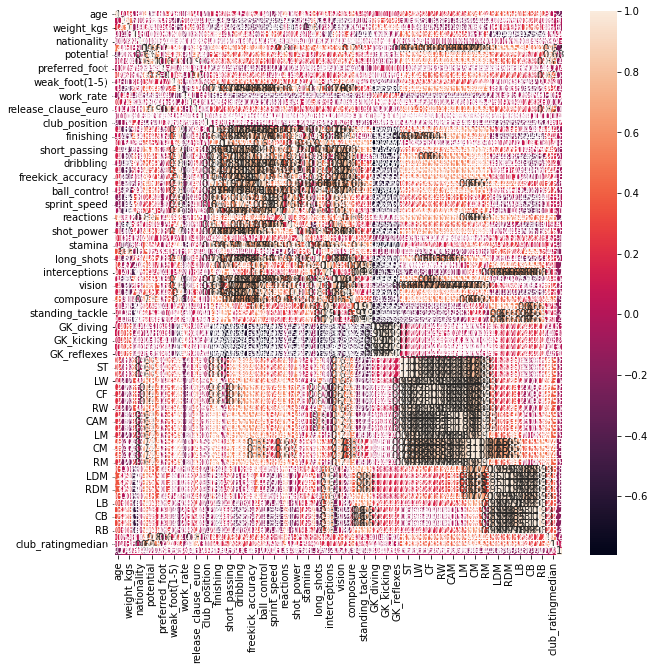

In [135]:
import seaborn as sns
corr = df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot = True)
plt.show()

In [136]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_arr = dataset.corr()
    for i in range (len(corr_arr)):
        for j in range (i):
            if abs(corr_arr.iloc[i,j])>threshold:
                colname = corr_arr.columns[i]
                col_corr.add(colname)
    return col_corr

In [137]:
corr_features = correlation(df,0.6)

In [138]:
len(corr_features)

64

In [139]:
df1 = df.drop(corr_features,axis=1)

In [140]:
df1.shape

(17954, 16)

In [141]:
df1.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,preferred_foot,weak_foot(1-5),skill_moves(1-5),work_rate,body_type,club_team,club_position,heading_accuracy,jumping,club_jersey_numbermode
0,31,170.18,72.1,214,6,94,0,4,4,7,4,226,26,70,68,10.0
1,27,154.94,76.2,72,39,88,1,5,4,2,3,617,10,52,50,23.0
2,25,190.50,83.9,228,53,88,1,4,5,2,6,395,10,75,83,6.0
3,27,162.56,59.0,549,76,88,1,4,4,2,6,419,14,56,53,24.0
4,27,187.96,88.9,104,126,88,1,3,2,0,6,419,9,83,81,26.0


In [142]:
df1.columns

Index(['age', 'height_cm', 'weight_kgs', 'positions', 'nationality',
       'overall_rating', 'preferred_foot', 'weak_foot(1-5)',
       'skill_moves(1-5)', 'work_rate', 'body_type', 'club_team',
       'club_position', 'heading_accuracy', 'jumping',
       'club_jersey_numbermode'],
      dtype='object')

Observation:- More than 60% of correlated columns are dropped, Out of 80 columns 64 Columns are correlated to each other remaining 16 columns are not correlated to each other.

### Apply the variance and remove the columns whose variance is less that 20%.

In [143]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold =20)

In [144]:
var_thres.fit(df1)
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False,  True,  True,  True,  True,  True])

In [145]:
df1.columns[var_thres.get_support()==True]

Index(['age', 'height_cm', 'weight_kgs', 'positions', 'nationality',
       'overall_rating', 'club_team', 'club_position', 'heading_accuracy',
       'jumping', 'club_jersey_numbermode'],
      dtype='object')

In [146]:
df1.columns[var_thres.get_support()==False]

Index(['preferred_foot', 'weak_foot(1-5)', 'skill_moves(1-5)', 'work_rate',
       'body_type'],
      dtype='object')

In [147]:
df3 = df1.drop(df1.columns[var_thres.get_support()==False],axis=1)

In [148]:
df3.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,club_team,club_position,heading_accuracy,jumping,club_jersey_numbermode
0,31,170.18,72.1,214,6,94,226,26,70,68,10.0
1,27,154.94,76.2,72,39,88,617,10,52,50,23.0
2,25,190.50,83.9,228,53,88,395,10,75,83,6.0
3,27,162.56,59.0,549,76,88,419,14,56,53,24.0
4,27,187.96,88.9,104,126,88,419,9,83,81,26.0


Observation:- We got 11 columns after removing less than 20% Variance columns out of 16 columns.

In [149]:
df2 = df1.drop(df1.columns[var_thres.get_support()==True],axis=1)
df2.head()

,preferred_foot,weak_foot(1-5),skill_moves(1-5),work_rate,body_type
0,0,4,4,7,4
1,1,5,4,2,3
2,1,4,5,2,6
3,1,4,4,2,6
4,1,3,2,0,6


In [150]:
set(df2['body_type'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [151]:
set(df2['preferred_foot'])

{0, 1}

In [152]:
set(df2['skill_moves(1-5)'])

{1, 2, 3, 4, 5}

In [153]:
set(df2['weak_foot(1-5)'])

{1, 2, 3, 4, 5}

In [154]:
set(df2['work_rate'])

{0, 1, 2, 3, 4, 5, 6, 7, 8}

In [155]:
var_thres = VarianceThreshold(threshold =2)
var_thres.fit(df2)
var_thres.get_support()

array([False, False, False,  True,  True])

In [156]:
df2 = df2.drop(df2.columns[var_thres.get_support()==False],axis=1)

In [157]:
df2.head()

,work_rate,body_type
0,7,4
1,2,3
2,2,6
3,2,6
4,0,6


Observation:-In df2 Columns(preferred_foot,weak_foot(1-5),skill_moves(1-5),work_rate,body_type) Values are less than 10, For that to find a Variance in columns the variance is given as a 2.

##### Adding columns very we get variance more than 20%. 

In [158]:
df3['work_rate']=df2['work_rate']

In [159]:
df3['body_type']=df2['body_type']

In [160]:
df3.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,club_team,club_position,heading_accuracy,jumping,club_jersey_numbermode,work_rate,body_type
0,31,170.18,72.1,214,6,94,226,26,70,68,10.0,7,4
1,27,154.94,76.2,72,39,88,617,10,52,50,23.0,2,3
2,25,190.50,83.9,228,53,88,395,10,75,83,6.0,2,6
3,27,162.56,59.0,549,76,88,419,14,56,53,24.0,2,6
4,27,187.96,88.9,104,126,88,419,9,83,81,26.0,0,6


Observation:- We got 13 columns after applying 20% of Variance.

#### Conclusion:- In the Fifa dataset we have 92 Columns, after removing unwanted columns and Null values handling we got 80 Columns, that more than 80% of the columns are having 60% correlation with each other columns so we drooped those columns, after that, we applied variance to the 16 columns there we got 5 columns having less than 20% Variance we removed those columns finally we got 13 Columns.  

# 

### Conclusion:-The FIFA Dataset has more correlation with each other columns.